# Task
Classify forest cover type based on cartographic and environmental features using the "covtype.csv" dataset. Clean and preprocess the data, train and evaluate a multi-class classification model (XGBoost), visualize the confusion matrix, and analyze feature importance.

## Load the data

### Subtask:
Load the `covtype.csv` file into a pandas DataFrame.


In [19]:
import pandas as pd

df = pd.read_csv('covtype.csv')
display(df.head())
display(df.info())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

None

## Prepare the data

### Subtask:
Separate the features (X) and the target variable (y).


In [20]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

display(X.head())
display(y.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


,Cover_Type
0,5
1,5
2,2
3,2
4,5


## Preprocess the data

### Subtask:
Handle categorical features and split the data into training and testing sets.


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = [col for col in X_train.columns if 'Soil_Type' in col or 'Wilderness_Area' in col]

print("Categorical features identified:", categorical_features)

Categorical features identified: ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


In [22]:
X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=False)
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=False)

X_train, X_test = X_train.align(X_test, join='inner', axis=1)

print("Shape of X_train after one-hot encoding:", X_train.shape)
print("Shape of X_test after one-hot encoding:", X_test.shape)

Shape of X_train after one-hot encoding: (464809, 98)
Shape of X_test after one-hot encoding: (116203, 98)


## Train the model

### Subtask:
Train a multi-class classification model (e.g., XGBoost) on the training data.


In [23]:
from xgboost import XGBClassifier

y_train_adjusted = y_train - 1

# Remove rows with NaN in y_train_adjusted
nan_mask = y_train_adjusted.isna()
X_train_cleaned = X_train[~nan_mask]
y_train_adjusted_cleaned = y_train_adjusted[~nan_mask]


xgb_model = XGBClassifier()
xgb_model.fit(X_train_cleaned, y_train_adjusted_cleaned)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Evaluate the model

### Subtask:
Evaluate the model's performance on the testing data using appropriate metrics and visualize the confusion matrix.


Accuracy: 0.8712
F1-score (weighted): 0.8705


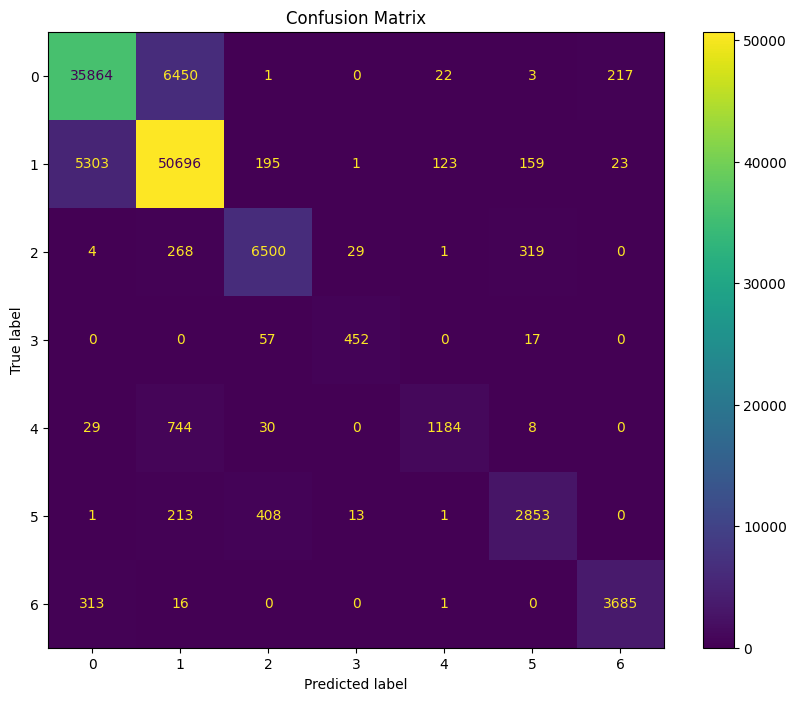

In [24]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_adjusted = xgb_model.predict(X_test)
y_pred = y_pred_adjusted + 1

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()

## Analyze feature importance

### Subtask:
Determine the importance of each feature in the model's predictions.


In [25]:
feature_importances = xgb_model.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

display("Top 10 Most Important Features:")
display(sorted_feature_importances.head(10))

'Top 10 Most Important Features:'

,0
Elevation,0.094703
Wilderness_Area1_0,0.060193
Soil_Type22_0,0.059403
Soil_Type2_0,0.048696
Soil_Type32_0,0.042156
Soil_Type12_0,0.041687
Soil_Type39_0,0.040558
Soil_Type4_0,0.038272
Wilderness_Area3_0,0.032554
Soil_Type38_0,0.030647


## Summary:

### Data Analysis Key Findings

*   The dataset contains 581,012 entries and 55 features, with no missing values.
*   The target variable 'Cover\_Type' has labels ranging from 1 to 7.
*   Categorical features related to Wilderness Area and Soil Type were identified and one-hot encoded.
*   The XGBoost model achieved an accuracy of approximately 87.12% and a weighted F1-score of approximately 87.05% on the test set.
*   The confusion matrix reveals how well the model performs for each cover type, indicating areas of strength and common misclassifications.
*   The feature importance analysis identified the most influential features in predicting the forest cover type.

### Insights or Next Steps

*   The model shows good overall performance, but further analysis of the confusion matrix could highlight specific cover types that are more challenging to classify accurately, suggesting potential areas for model improvement or data collection.
*   Investigating the top-performing features could provide valuable insights into the environmental and cartographic factors that most strongly determine forest cover type.
